Analysis of the Dataset

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Dataset/New vehicle dataset.xlsx')
print(df.head())

   Year  Two wheelers  Passenger vehicles  Commercial vehicles  Three wheelers
0  2011          11.8                 2.5                 0.68            0.53
1  2012          13.4                 2.6                 0.81            0.51
2  2013          13.8                 2.7                 0.79            0.54
3  2014          14.8                 2.5                 0.63            0.48
4  2015          16.0                 2.6                 0.61            0.53


In [ ]:
print(df.describe())

            Year  Two wheelers  Passenger vehicles  Commercial vehicles  \
count    14.0000     14.000000           14.000000            14.000000   
mean   2017.5000     16.080000            3.004286             0.765714   
std       4.1833      2.645242            0.527851             0.137880   
min    2011.0000     11.800000            2.500000             0.570000   
25%    2014.2500     14.050000            2.625000             0.682500   
50%    2017.5000     15.930000            2.785000             0.720000   
75%    2020.7500     17.555000            3.242500             0.847500   
max    2024.0000     21.180000            4.220000             1.000000   

       Three wheelers  
count       14.000000  
mean         0.520000  
std          0.139063  
min          0.220000  
25%          0.495000  
50%          0.530000  
75%          0.615000  
max          0.700000  


Visualisation of the dataset

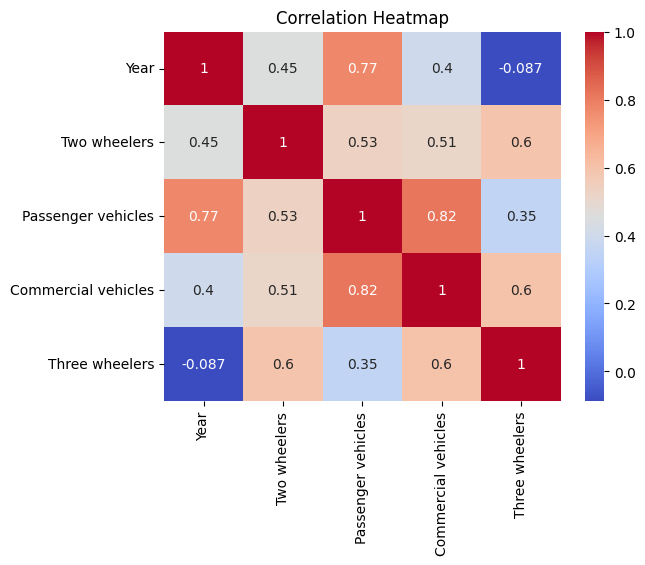

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

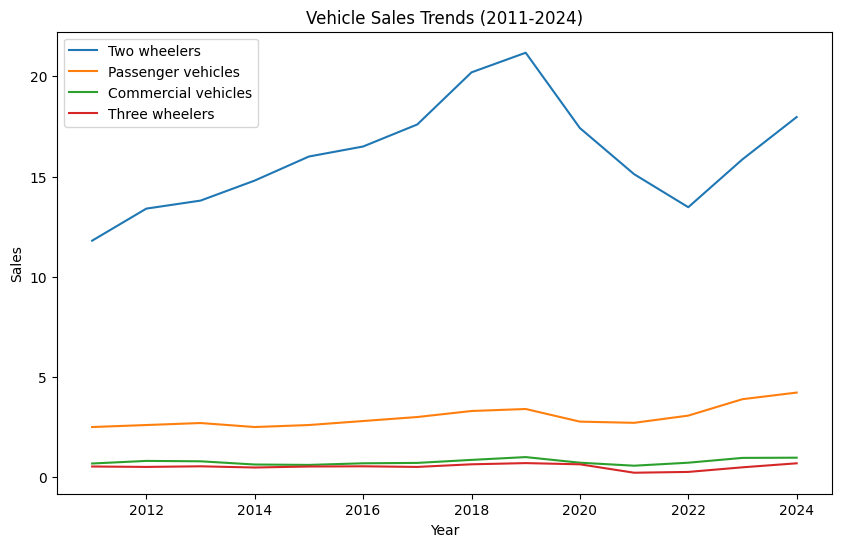

In [ ]:
plt.figure(figsize=(10,6))
for column in df.columns[1:]:  
    plt.plot(df['Year'], df[column], label=column)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Vehicle Sales Trends (2011-2024)')
plt.legend()
plt.show()


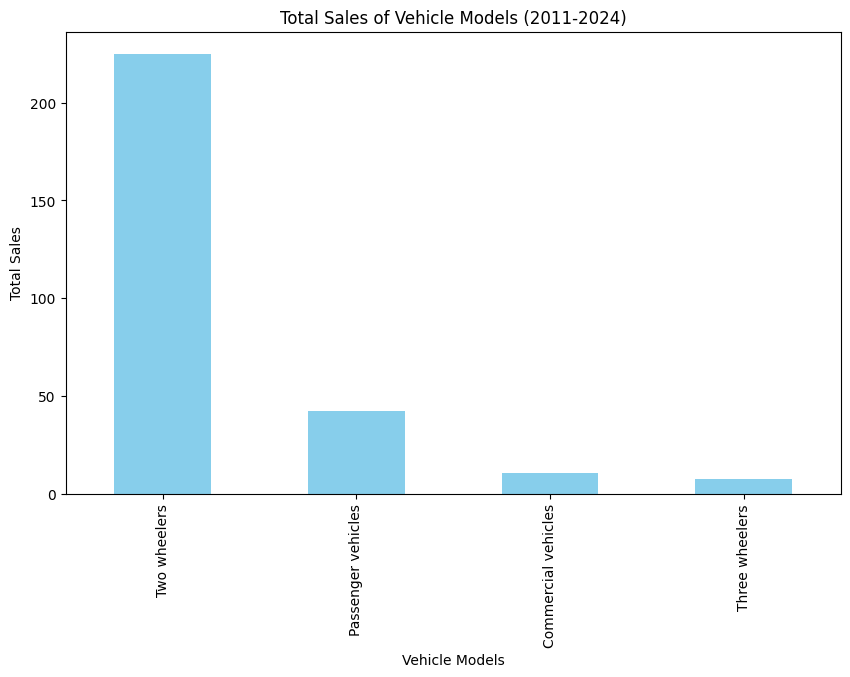

In [ ]:
df_sales_sum = df.drop('Year', axis=1).sum()
df_sales_sum.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Total Sales of Vehicle Models (2011-2024)")
plt.ylabel('Total Sales')
plt.xlabel('Vehicle Models')
plt.show()


In [ ]:
!pip install statsmodels


In [ ]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt


<Figure size 1200x800 with 0 Axes>

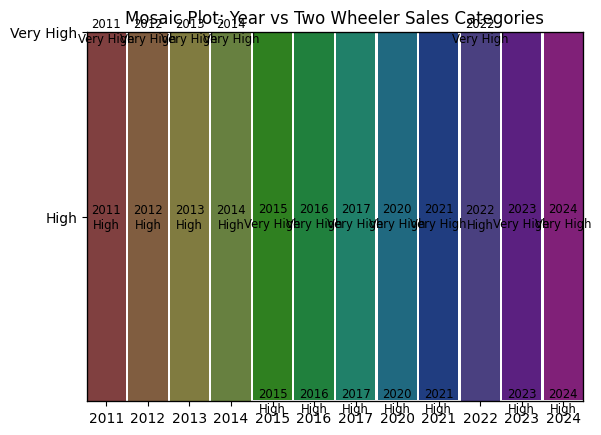

In [ ]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Dataset/New vehicle dataset.xlsx'  
data = pd.read_excel(file_path)
bins = [0, 5, 10, 15, 20]  
labels = ['Low', 'Medium', 'High', 'Very High']

data['Two_wheeler_Category'] = pd.cut(data['Two wheelers'], bins=bins, labels=labels, right=False)
data['Passenger_Vehicle_Category'] = pd.cut(data['Passenger vehicles'], bins=bins, labels=labels, right=False)
data['Commercial_Vehicle_Category'] = pd.cut(data['Commercial vehicles'], bins=bins, labels=labels, right=False)
data['Three_Wheeler_Category'] = pd.cut(data['Three wheelers'], bins=bins, labels=labels, right=False)

mosaic_data = pd.crosstab(data['Year'], data['Two_wheeler_Category'])

plt.figure(figsize=(12, 8))
mosaic(mosaic_data.stack())
plt.title("Mosaic Plot: Year vs Two Wheeler Sales Categories")
plt.show()

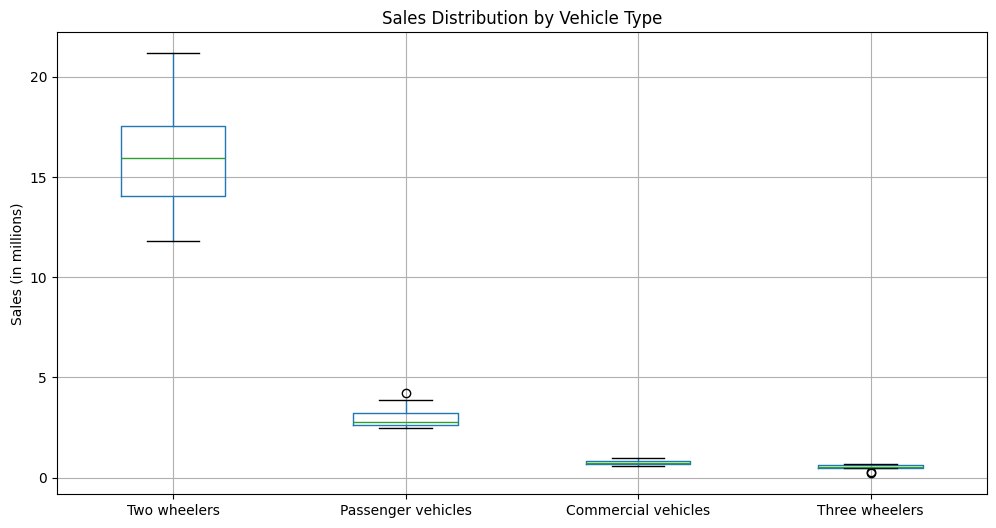

In [ ]:
data[['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']].boxplot(figsize=(12, 6))
plt.title('Sales Distribution by Vehicle Type')
plt.ylabel('Sales (in millions)')
plt.grid(True)
plt.show()


Segmentation by vehicle types

Segmentation based on sales categories

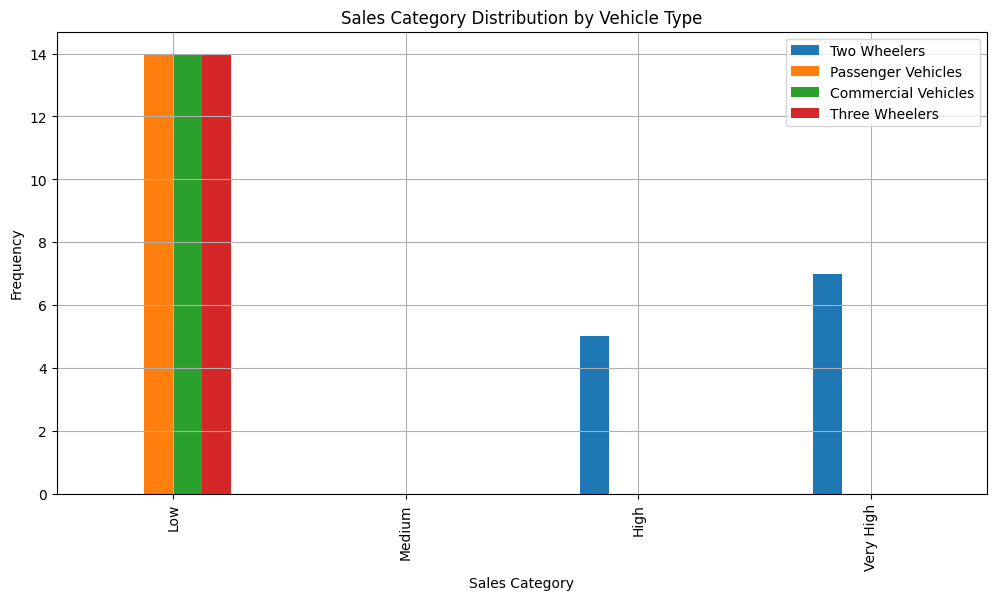

In [ ]:
category_count = {
    'Two Wheelers': data['Two_wheeler_Category'].value_counts(),
    'Passenger Vehicles': data['Passenger_Vehicle_Category'].value_counts(),
    'Commercial Vehicles': data['Commercial_Vehicle_Category'].value_counts(),
    'Three Wheelers': data['Three_Wheeler_Category'].value_counts(),
}

category_count_df = pd.DataFrame(category_count)

category_count_df.plot(kind='bar', figsize=(12, 6))
plt.title('Sales Category Distribution by Vehicle Type')
plt.ylabel('Frequency')
plt.xlabel('Sales Category')
plt.grid(True)
plt.show()


Segmentation by Growth Trends(CAGR Analysis)

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dataset/New vehicle dataset.xlsx')

def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

start_year = 2011
end_year = 2024
cagr = {}

for vehicle_type in ['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']:
    start_value = data.loc[data['Year'] == start_year, vehicle_type].values[0]
    end_value = data.loc[data['Year'] == end_year, vehicle_type].values[0]
    cagr[vehicle_type] = calculate_cagr(start_value, end_value, end_year - start_year)

cagr_df = pd.DataFrame(cagr.values(), index=cagr.keys(), columns=['CAGR (%)'])
print(cagr_df)


                     CAGR (%)
Two wheelers         3.288325
Passenger vehicles   4.109459
Commercial vehicles  2.770003
Three wheelers       2.050074


Segmentation by contribution to total sales

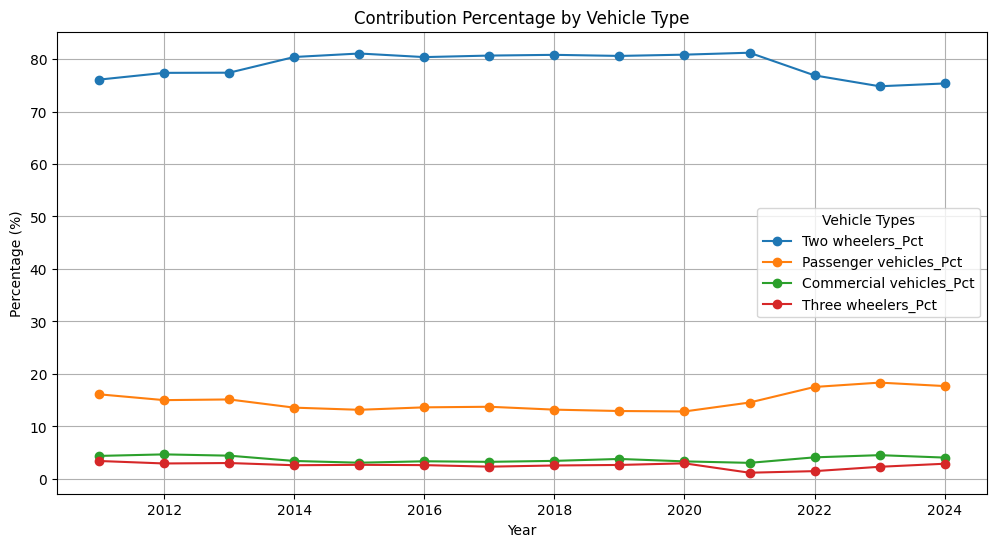

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_excel('/content/drive/MyDrive/Dataset/New vehicle dataset.xlsx')
data['Total Sales'] = data[['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']].sum(axis=1)

for vehicle_type in ['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']:
    data[f'{vehicle_type}_Pct'] = (data[vehicle_type] / data['Total Sales']) * 100

data[['Year', 'Two wheelers_Pct', 'Passenger vehicles_Pct', 'Commercial vehicles_Pct', 'Three wheelers_Pct']].set_index('Year').plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Contribution Percentage by Vehicle Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Vehicle Types')
plt.show()


Clustering based segmentation(K-Means Clustering)

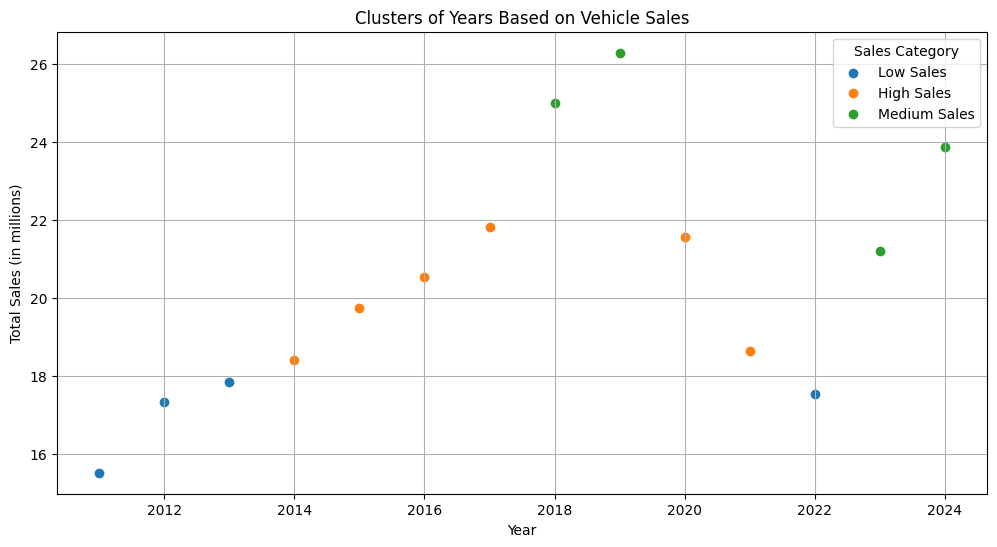

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_data = data[['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_centroids = kmeans.cluster_centers_
cluster_labels = ['High Sales', 'Medium Sales', 'Low Sales'] 

plt.figure(figsize=(12, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Year'], cluster_data['Total Sales'], label=f'{cluster_labels[cluster]}')

plt.title('Clusters of Years Based on Vehicle Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Sales Category')
plt.grid(True)
plt.show()


Self-Organizing Maps

In [ ]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=d849ebf2340df844b57b2d34d7eba223ead14df8fbe5da39e53295d147241d04
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.4167760839624863


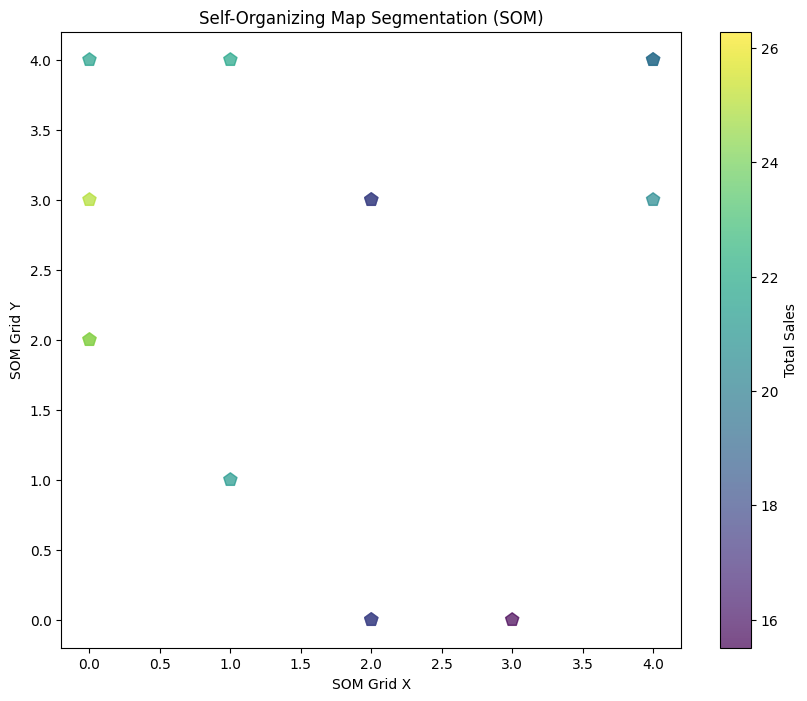

                               Year  Two wheelers  Passenger vehicles  \
SOM_Cluster_X SOM_Cluster_Y                                             
0             2              2021.5        19.575                3.81   
              3              2018.0        20.200                3.30   
              4              2020.0        17.420                2.77   
1             1              2023.0        15.860                3.89   
              4              2017.0        17.600                3.00   
2             0              2012.5        13.600                2.65   
              3              2021.5        14.295                2.89   
3             0              2011.0        11.800                2.50   
4             3              2016.0        16.500                2.80   
              4              2014.5        15.400                2.55   

                             Commercial vehicles  Three wheelers  Total Sales  
SOM_Cluster_X SOM_Cluster_Y                

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('/content/drive/MyDrive/Dataset/New vehicle dataset.xlsx') 
data['Total Sales'] = data[['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']].sum(axis=1)

clustering_data = data[['Two wheelers', 'Passenger vehicles', 'Commercial vehicles', 'Three wheelers']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

som = MiniSom(x=5, y=5, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)

som.train(scaled_data, 100, verbose=True)  
bmus = np.array([som.winner(x) for x in scaled_data])

data['SOM_Cluster_X'] = bmus[:, 0]
data['SOM_Cluster_Y'] = bmus[:, 1]

plt.figure(figsize=(10, 8))

plt.scatter(data['SOM_Cluster_X'], data['SOM_Cluster_Y'], c=data['Total Sales'], cmap='viridis', s=100, marker='p', alpha=0.7)
plt.colorbar(label='Total Sales')

plt.title('Self-Organizing Map Segmentation (SOM)')
plt.xlabel('SOM Grid X')
plt.ylabel('SOM Grid Y')

plt.show()

clustered_data = data.groupby(['SOM_Cluster_X', 'SOM_Cluster_Y']).mean()
print(clustered_data)
